<a href="https://colab.research.google.com/github/nasrinsaalehi/Drawning-Detection-/blob/main/02_My_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch
Classification is a problem whether something is one thing or another

In [46]:
## 1. Make Classification data and get it ready


In [47]:
import sklearn

In [48]:
from sklearn.datasets import make_circles
# make 1000 samples
n_samples = 1000

# Create circles
X, y= make_circles(n_samples, 
                   noise= 0.03,
                   random_state= 42)

In [49]:
len(X), len(y)

(1000, 1000)

In [50]:
# Make DataFreame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label": y})
circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


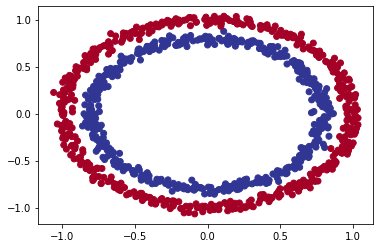

In [51]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x= X[:,0],
            y=X[:,1],
            c=y,
            cmap= plt.cm.RdYlBu)

*Note:* The datasert e are working with is called Toy dataset which is a small version of real world dataserts e are going to work with in future.

### 1.1 Check input output shapes


In [52]:
X.shape, y.shape

((1000, 2), (1000,))

In [53]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [54]:
# View the first example of features and labels
X_sample= X[0]
y_sample= y[0]
print (f"Values for one samlpe of X:{X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}")


Values for one samlpe of X:[0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X:(2,) and the same for y:()


### 1.2 Turn data into tensors and creat train and test splits



In [55]:
import torch
torch.__version__

'1.12.1+cu113'

In [56]:
# turn data into tensors
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [57]:
# Split data into training and test sets using sklearn lib

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   test_size= 0.2, #20% of the data will be est and 80% for training
                                                   random_state= 42)



In [58]:
len(X_train), len(X_test)

(800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.
To do so, we want to:
1. setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. construct a model (by subclassing nn.Module)
3. define a loss funstion and optimizer
4. create a training and test loop

In [59]:
# Building a model
import torch
from torch import nn

# make device agnostic code
device= "cuda" if torch.cuda.is_available()  else "cpu"
device

'cuda'

Now we have setup device agnostic code let's create a model that:

1. Subclasses `nn.Module` (almost all models in pytorch subclass `nn.Modul`)
2. create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward method that outlines the forawrd pass (or forward computation) method
4. instantiate an instance of our model class and set it to the target `device` 

In [60]:
# 1 .construct a model that subclassed nn.module

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # .2 create our nn.linear layers that are capable of handling the shapes of our data
    self.layer_1= nn.Linear(in_features= 2, out_features=5)
    self.layer_2= nn.Linear(in_features= 5, out_features= 1)

    #self.two_linear_layer= nn.Seuential(in_features= 2, out_features= 5),
    #                   nn.Linear(in_feattures= 5, out_features= 1)))
  
  # 3. Define a forward method that outlines te forward pass
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.layer_2(self.layer_1(x))
# 4. instantiate an nstant of our model and send it to de right device
model_0= CircleModelV1().to(device)
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [61]:
# let's replicate the model above using nn.Seuential()
model_00= nn.Sequential(
    nn.Linear(in_features= 2, out_features= 5).to(device),
    nn.Linear(in_features= 5, out_features= 1)).to(device)
model_00

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [62]:
 # make some predictions
 with torch.inference_mode():
   untrained_preds= model_0(X_test.to(device)).to(device)
   print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")

 

Length of predictions: 200, shape: torch.Size([200, 1])


### 2.1 Setup the loss function and optimizer

which loss funstion and optimizer e should use

again... this is problem specific

for example for regression you might want MAE or model_selection
for classification you might need binary cross entropy or categorical cross entropy.
and for optimizers, two of the most common optimizers are `SGD` and `Adam`

* For the loss funstion we are going to use `torch.nn.BCEwithLigitsLoss()`
* Search the internet to see what `Logit` means if it is the first time you have heard of that.
* for different optimizers see `torch.optim`


In [63]:
# Setup hte optimizer and loss fusction

#loss_fn= nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to input to BCELoss

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss= sigmoid activation function built-in
optimizer= torch.optim.SGD(params= model_0.parameters(),
                        lr= 0.1)

In [64]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true,y_pred).sum().item()
  acc= (correct/len(y_pred)) * 100
  return acc

## 3. Train the model
To train the model, we are goint to need to build a training loop:

1. Forward pass
2. Calculate the loss
3. optimizer zero grad
4. loss backward
5. optimizer step


### 3.1 Going from raw logits ->prediction probablities ->prediction labels
Our model outputs are going to be raw **logits**

We can convert these **logits** into **prediction probablities** by passing them to some kind of activation function (e.g. sigmoid for binary classification andsoftmax for multiclass classification)

Then we can convert our model prediction probablities to **predicton labels** by either rounding them or taking the `argmax()`



In [65]:
# view the firs 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0')

In [66]:
# Use the sigmoid activation function on our model logits to turn them inro prediction probs
y_pred_probs= torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0')

For our prediction probablity values, we need to perform a range-style rounding on them:
* `y_pred_probs` >=0.5, `y=1` (class 1)
* `y_pred_probs`<0.5, `y=0` (class 0) 

In [67]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

### 3.2 Building a training and testing loop


In [68]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of the epochs
epochs= 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training 
  model_0.train()

  # 1. forward pass
  y_logits= model_0(X_train).squeeze()
  y_preds= torch.round(torch.sigmoid(y_logits)) # turn the logits-> pred probs -> pred labels

  # 2. calculate loss/ accuracy
  loss= loss_fn(y_logits,
                y_train)
  acc= accuracy_fn(y_true= y_train, y_pred= y_preds)
  
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits= model_0(X_test).squeeze()
    test_preds= torch.round(torch.sigmoid(test_logits))

    # 2. calculate the loss/ acc
    test_loss= loss_fn(test_logits,
                       y_test)
    test_acc= accuracy_fn(y_true= y_test,
                          y_pred= test_preds)
    # print out whats happening
    if epoch % 10 ==0 :
      print (f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss:{test_loss:.5f} | Test acc {test_acc:.5f}%")

Epoch: 0 | Loss: 0.69569, Acc: 50.00% | Test loss:0.69721 | Test acc 50.00000%
Epoch: 10 | Loss: 0.69403, Acc: 50.00% | Test loss:0.69615 | Test acc 50.00000%
Epoch: 20 | Loss: 0.69343, Acc: 46.00% | Test loss:0.69585 | Test acc 48.50000%
Epoch: 30 | Loss: 0.69321, Acc: 49.00% | Test loss:0.69577 | Test acc 47.50000%
Epoch: 40 | Loss: 0.69312, Acc: 49.50% | Test loss:0.69573 | Test acc 46.50000%
Epoch: 50 | Loss: 0.69308, Acc: 50.38% | Test loss:0.69569 | Test acc 46.50000%
Epoch: 60 | Loss: 0.69306, Acc: 50.50% | Test loss:0.69564 | Test acc 46.50000%
Epoch: 70 | Loss: 0.69305, Acc: 50.50% | Test loss:0.69559 | Test acc 46.50000%
Epoch: 80 | Loss: 0.69304, Acc: 50.75% | Test loss:0.69553 | Test acc 46.50000%
Epoch: 90 | Loss: 0.69303, Acc: 50.38% | Test loss:0.69547 | Test acc 46.50000%


## 4. make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it lets make some more predictions and visualize them

In other words, visualize visualize, visualize....
T do so, we are going to import a function called written by daniel!



In [69]:
import requests
from pathlib import Path

# download helper functions from Learn Pytorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, skipping download")
else:
  print("Download helper _functions.py")
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper _functions.py


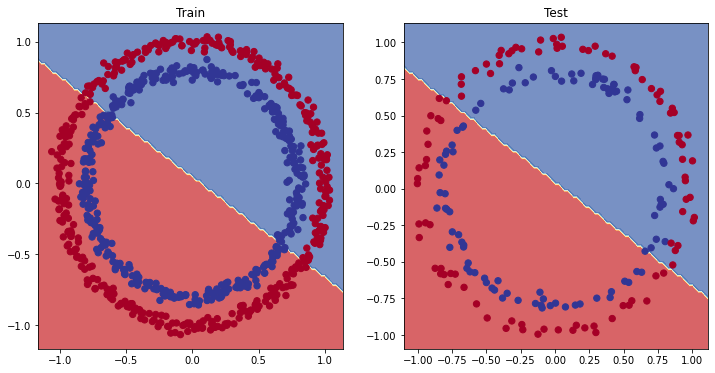

In [70]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving the model (from a model perspective)
* Add more layers - give the model more chances to learn the patterns int he data
* Add more hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function
 These options are all form model perspective because they deal directly with our model, rather than data.

 And because these options are all values we can change they are called **hyperparameters**.


In [71]:
model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5417,  0.5875],
                      [-0.1763,  0.6438],
                      [-0.1580,  0.1410],
                      [-0.3381,  0.4186],
                      [ 0.6194, -0.5209]])),
             ('layer_1.bias',
              tensor([0.6110, 0.1607, 0.5295, 0.0792, 0.3511])),
             ('layer_2.weight',
              tensor([[-0.0395,  0.3512,  0.1112, -0.1981,  0.1316]])),
             ('layer_2.bias', tensor([-0.1249]))])

In [72]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features= 2, out_features=10)
    self.layer_2= nn.Linear(in_features= 10, out_features=10)
    self.layer_3= nn.Linear(in_features= 10, out_features= 1)

  def forward(self, x: torch.tensor)->torch.tensor:
    return self.layer_3(self.layer_2(self.layer_1(x))) # these way of writing operations in one command will accelerate the speed

model_1= CircleModelV1().to(device)
model_1 

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [73]:
# Creating the model optimizer and loss function
loss_fn= nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params= model_1.parameters(), lr=0.001)


In [74]:
# Training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs= 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_1.train()
  # forward pass
  y_logits= model_1(X_train).squeeze()
  y_preds= torch.round(torch.sigmoid(y_logits)) # turn the logits-> pred probs -> pred labels

  # calculate the loss
  loss= loss_fn(y_logits, y_train)
  acc= accuracy_fn(y_true= y_train, y_pred= y_preds)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # forward pass
    test_logits= model_1(X_test).squeeze()
    test_preds= torch.round(torch.sigmoid(test_logits))
    # calculate the loss
    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true= y_test, y_pred= test_preds)
  # print out whats happenning
  if epoch % 100 ==0:
   print(f"epoch: {epoch} | Train loss: {loss} | Train Acc:{acc} | Test loss: {test_loss} | Test Acc: {test_acc}")


epoch: 0 | Train loss: 0.6939550638198853 | Train Acc:50.875 | Test loss: 0.6926103234291077 | Test Acc: 51.0
epoch: 100 | Train loss: 0.6939223408699036 | Train Acc:50.5 | Test loss: 0.6926147937774658 | Test Acc: 51.0
epoch: 200 | Train loss: 0.6938914060592651 | Train Acc:50.625 | Test loss: 0.6926204562187195 | Test Acc: 50.5
epoch: 300 | Train loss: 0.6938619613647461 | Train Acc:50.625 | Test loss: 0.6926270723342896 | Test Acc: 50.5
epoch: 400 | Train loss: 0.6938338875770569 | Train Acc:50.625 | Test loss: 0.6926344037055969 | Test Acc: 51.0
epoch: 500 | Train loss: 0.6938071846961975 | Train Acc:50.74999999999999 | Test loss: 0.6926426291465759 | Test Acc: 50.5
epoch: 600 | Train loss: 0.6937817335128784 | Train Acc:50.625 | Test loss: 0.6926515698432922 | Test Acc: 51.0
epoch: 700 | Train loss: 0.6937573552131653 | Train Acc:50.24999999999999 | Test loss: 0.6926609873771667 | Test Acc: 51.0
epoch: 800 | Train loss: 0.6937341094017029 | Train Acc:50.0 | Test loss: 0.6926710605

In [76]:
# Create some data 
weight= 0.7
bias= 0.3
start= 0
end=1
step= 0.01

#Create data
X_regression= torch.arange(start, end, step).unsqueeze(dim=1)
y_regression= weight * X_regression+ bias


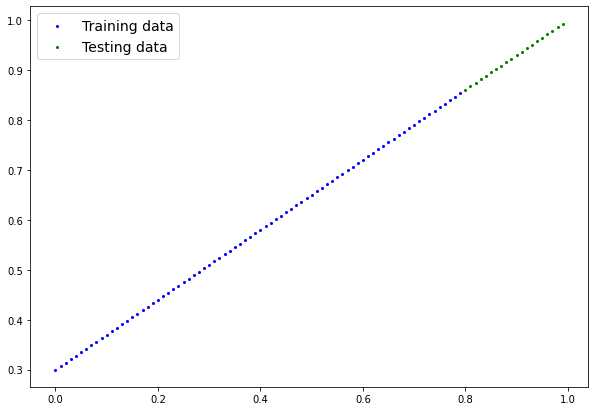

In [77]:
train_split= int(0.8*len(X_regression))
X_train_reg , y_train_reg = X_regression[:train_split], y_regression[:train_split]
X_test_reg , y_test_reg = X_regression[train_split:], y_regression[train_split:]
plot_predictions(train_data= X_train_reg,
                 train_labels= y_train_reg,
                 test_data= X_test_reg,
                 test_labels= y_test_reg,
                 predictions= None)

### 5.2 Adjusting `model_1` to fit the streight line

# Multiclass Classification


## Creating a tory multiclass dataset


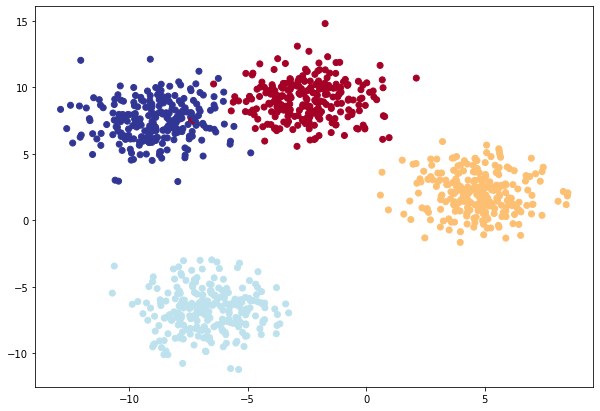

In [78]:
# import our dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Creat multiclass data
X_blob, y_blob= make_blobs(n_samples= 1000,
                           n_features= NUM_FEATURES,
                           centers= NUM_CLASSES,
                           cluster_std= 1.5,
                           random_state= RANDOM_SEED)
# 2. Turn data into tensors
X_blob= torch.from_numpy(X_blob).type(torch.float)
y_blob= torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into test and train sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test= train_test_split(X_blob,
                                                                       y_blob,
                                                                       test_size= 0.2,
                                                                       random_state=RANDOM_SEED)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)


In [79]:
# Creat device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [80]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units= 8):
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
        nn.Linear(in_features= input_features, out_features= hidden_units),
        nn.Linear(in_features= hidden_units, out_features= hidden_units),
        nn.Linear(in_features= hidden_units, out_features= output_features)
        )
  def forward(self, x):
    return self.linear_layer_stack(x)

In [81]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [82]:
model_4= BlobModel(input_features= NUM_FEATURES,
                   output_features= NUM_CLASSES,
                   hidden_units= 8)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [83]:
# Create a loss function ans an optimizer
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model_4.parameters(),
                           lr= 0.1)


In [86]:
from numpy.random.mtrand import logseries
# Building a training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs= 1000
#X_blob_train, y_blob_train= X_blob_train.to(device), y_blob_train.to(device)
#X_blob_test, y_blob_test= X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits= model_4(X_blob_train)
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_preds = torch.argmax(y_pred_probs, dim=1)
  loss= loss_fn(y_logits, y_blob_train)
  acc= accuracy_fn(y_true= y_blob_train, y_pred= y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model_4.eval()
  with torch.inference_mode():
    test_logits= model_4(X_blob_test)
    test_preds= torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss= loss_fn(test_logits, y_blob_test)
    test_acc= accuracy_fn(y_true= y_blob_test, y_pred= test_preds)

  if epoch % 100 ==0:
   print(f"epoch: {epoch} | Train loss: {loss} | Train Acc:{acc} | Test loss: {test_loss} | Test Acc: {test_acc}")


epoch: 0 | Train loss: 0.03174715116620064 | Train Acc:99.125 | Test loss: 0.022810176014900208 | Test Acc: 99.5
epoch: 100 | Train loss: 0.02704443968832493 | Train Acc:99.125 | Test loss: 0.01700836420059204 | Test Acc: 99.5
epoch: 200 | Train loss: 0.025635259225964546 | Train Acc:99.25 | Test loss: 0.014975804835557938 | Test Acc: 99.5
epoch: 300 | Train loss: 0.024917392060160637 | Train Acc:99.25 | Test loss: 0.013884106650948524 | Test Acc: 99.5
epoch: 400 | Train loss: 0.024439584463834763 | Train Acc:99.25 | Test loss: 0.013171333819627762 | Test Acc: 99.5
epoch: 500 | Train loss: 0.024071188643574715 | Train Acc:99.25 | Test loss: 0.012649140320718288 | Test Acc: 99.5
epoch: 600 | Train loss: 0.02376270294189453 | Train Acc:99.25 | Test loss: 0.012236448936164379 | Test Acc: 99.5
epoch: 700 | Train loss: 0.023491598665714264 | Train Acc:99.25 | Test loss: 0.011892820708453655 | Test Acc: 99.5
epoch: 800 | Train loss: 0.023246178403496742 | Train Acc:99.25 | Test loss: 0.01159